<a href="https://colab.research.google.com/github/cianchee/Math-152/blob/main/P2_g1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Present by Group Don't Mess With Us: 
## BAXI Siddharth, CHEE Cian, COCHRAN Victoria, WILBY Daniel, YANG Bo
### Our Exploration of Random Walk

Mathematically, we can prove that in 1 dimension or 2 dimensions, with a equal probability to go any direction, it will eventually return to the origin. But in 3 dimensions, the probability is less than $\frac{\sqrt3}{\frac{2}{3}π^{\frac{3}{2}}}\frac{1}{n^{\frac{3}{2}}}$ where n is the total steps (by using properties in Markov chains and Stirling's formula, but will not be shown here for simplicity). But we didn't observe the distance to the origin is around $\sqrt N$ after $N$ steps. Or maybe greater $N$ should be tested. We've tried multiple variants, and how each variant is tested will be explained below.

### 1st Variant

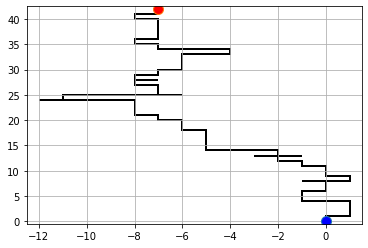

Max distance away from origin acheived:  42.579337712087536
Projected distance from origin after 100 steps (sqrt(num steps)):  10.0
Distance away from origin after 100 steps:  42.579337712087536


In [ ]:
#1
import random;
import numpy as np;
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

# returns random 2d offset
def rand_dir():
  d = random.randrange(4);
  if d == 0:
    return np.array([1, 0])
  if d == 1:
    return np.array([-1, 0])
  if d == 2:
    return np.array([0, 1])
  return np.array([0, -1])

# L2 norm
def distance(x):
  return ((x[0])**2 + (x[1])**2)**(1/2);

# simulate walk in N steps
# returns the positions and related values
def walk(N):
  max_distance = 0.0;
  min_x = 0.0;
  max_x = 0.0;
  min_y = 0.0;
  max_y = 0.0;

  p = np.zeros((N, 2));
  for i in range(N):
    dir = rand_dir();
    if i == 0:
      p[i] = [ 0, 0 ];
    else:
      while True:
        if (p[i][1] == 0 and dir[1] < 0): #or (p[i][0] == 0 and dir[0] < 0):
          dir = rand_dir();
        else:
          break
      p[i][0] = p[i - 1][0] + dir[0];
      p[i][1] = p[i - 1][1] + dir[1];
    dist = distance(p[i]);
    
    max_distance = max(max_distance, dist);
    min_x = min(p[i][0], min_x);
    max_x = max(p[i][0], max_x);
    min_y = min(p[i][1], min_y);
    max_y = max(p[i][1], max_y);
  #print(p)
  return (p, max_distance, min_x, max_x, min_y, max_y);

# Actually calculate the walk here
N = 100
(positions, max_distance, min_x, max_x, min_y, max_y) = walk(N);

# create path object to be used by graph
path = Path(positions);

# padding on graph
edge_offset = 0.5;

# create the plot
fig, ax = plt.subplots()
# plot the walk using a path
patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)
# set graph bounds
ax.set_xlim(min_x - edge_offset, max_x + edge_offset)
ax.set_ylim(min_y - edge_offset, max_y + edge_offset)

# add start and end markers
# blue is start, red is end
plt.plot(positions[0][0], positions[0][1], marker="o", markersize=10, markerfacecolor="blue")
plt.plot(positions[-1][0], positions[-1][1], marker="o", markersize=10, markerfacecolor="red")

plt.grid();
plt.show()

print("Max distance away from origin acheived: ", max_distance);
print("Projected distance from origin after", N, "steps (sqrt(num steps)): ", N**(1/2))
print("Distance away from origin after", N, "steps: ", distance(positions[-1]))

### 3rd Variant
### 3rd Variant
To see how the endpoints are distributed and whether it returns to the origin, we need a scatter plot and a histogram. The scatter plot is used to present the endpoint of multiple trials, and the histogram is used to see if a value is reached many times. And since the movement would just be up and down, I didn't plot a PIL to show how it goes. By observation, with the help of gravity, the endpoints are more frequently located around 0. The histogram shows it returned to the origin thousands of times, and 1 is the value most returned. I believe it's because when it's 0, it always bounces back to 1, and gravity also helps the value drop to 1. In addition, the gravity makes the distance between the endpoints and the origin smaller than predicted.

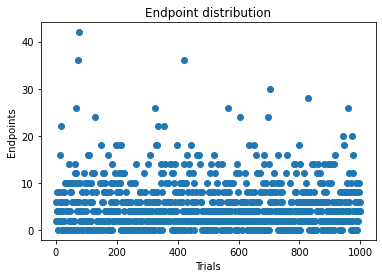

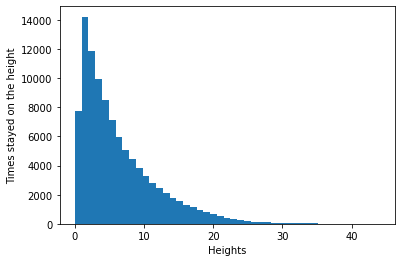

In [ ]:
#3
import numpy as np
import matplotlib.pyplot as plt

def lift(n): # The function used to output the places of each step walk, n = n steps
    height_history = [0] # List used to store the height after each step
    height = 0
    for i in range(n):
        step = np.random.choice([-1,-1,-1,-1,-1,-1,1,1,1,1,1]) # Modify the probability. A very inefficient way I know...
        if height == 0: # Hits 0 and bounces back
            height += 1
        else:
            height = height + step
        height_history.append(height)
    return height_history

def endpoint(n): # The function which returns the endpoint after n steps
    height = 0
    for i in range(n):
        step = np.random.choice([-1,-1,-1,-1,-1,-1,1,1,1,1,1])
        if height == 0: 
            height += 1
        else:
            height = height + step
    return height

def endpoint_trajectory(n): # Draw a graph of endpoints distribution after n trials
    y_axis = []
    for i in range(n):
        y_axis.append(endpoint(1000))
    x_axis = np.linspace(1,n,n)
    plt.title("Endpoint distribution")
    plt.xlabel("Trials")
    plt.ylabel("Endpoints")
    plt.scatter(x_axis,y_axis)
    plt.show()
    

def heights(n): # See how many times a place has been reached in n steps
    heights = lift(n)
    plt.hist(heights,bins=len(set(heights)))
    plt.xlabel("Heights")
    plt.ylabel("Times stayed on the height")
    plt.show()

endpoint_trajectory(1000)
heights(100000)

### 4th Variant
In this variant, I created a box that an object will walk in straight lines around. Each time the object walks into one of the edges of the box, it will bounce off and walk in another direction. 

In [ ]:
from PIL import Image, ImageDraw
import numpy as np

I first set up a black background image. I chose to make the background a 400 by 300 black rectangle so we can see the whole image easily and so it is easy to differentiate between the background and the edges of the box. I also imported the ImageDraw function from PIL to be able to draw the box that the object will be walking in and to be able to draw lines that will show the pathways the object takes. For the first walk the object takes, I generated 2 random integers for x and y to be able to find the slope of the line that will be the direction the object goes until it hits an edge. I decided to first use a normal xy-plane to make calculating the points at the edges easier, and so the edges would be at x=0, x=300, y=0, and y=200. Then, if the intersection of the lines and edges fit the dimensions inside the box, an endpoint would be found for the path and the path would be drawn on the image. Since I used PIL, I had to adjust the points accordingly to fit the coordinate system of the image. I could then draw the lines recursively making the endpoints the new starting points for the next pathway. After running the code a few times, I found that usually the final point would be somewhere along the bottom or right edge of the image and almost never at the beginning location. I also found that most of the time the pathways would create somesort of pattern and create diamond shapes. 

233.94160583941616 250


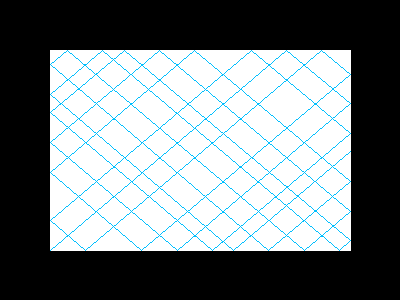

In [ ]:
walk_image = Image.new('RGB', (400, 300), (0, 0, 0))
draw = ImageDraw.Draw(walk_image)
draw.rectangle((50, 50, 350, 250), fill=(255, 255, 255), outline=(255,255,255))

x = np.random.randint(1, 301)
y = np.random.randint(1, 201)

slope = y / x
x_start = 0
y_start = 0

for i in range(100):
  b = y_start - (slope * x_start)
  left_edge_x = 0
  left_edge_y = b
  right_edge_x = 300
  right_edge_y = (slope * right_edge_x) + b
  bottom_edge_y = 0
  bottom_edge_x = (b * (-1)) / slope
  top_edge_y = 200
  top_edge_x = (200 - b) / slope


  if (left_edge_y != y_start) and (left_edge_y > 0) and (left_edge_y < 200):
    endpoint_x = 0
    endpoint_y = left_edge_y
    slope = 0 - slope
  elif (right_edge_y != y_start) and (right_edge_y > 0) and (right_edge_y < 200):
    endpoint_x = 300
    endpoint_y = right_edge_y
    slope = 0 - slope
  elif (bottom_edge_x != x_start) and (bottom_edge_x > 0) and (bottom_edge_x < 300):
    endpoint_x = bottom_edge_x
    endpoint_y = 0
    slope = 0 - slope
  elif (top_edge_x != x_start) and (top_edge_x > 0) and (top_edge_x < 300):
    endpoint_x = top_edge_x
    endpoint_y = 200
    slope = 0 - slope
  elif right_edge_y == 200:
    endpoint_x = 300
    endpoint_y = 200
    slope = 1
  elif bottom_edge_x == 0:
    endpoint_x = 0
    endpoint_y = 0
    slope = 1
  elif left_edge_y == 200:
    endpoint_x = 0
    endpoint_y = 200
    slope = -1
  elif bottom_edge_x == 300:
    endpoint_x = 300
    endpoint_y = 0
    slope = -1


  x_initial = 50 + x_start
  y_initial = 250 - y_start 
  x_end = 50 + endpoint_x
  y_end = 250 - endpoint_y 
  draw.line((x_initial, y_initial, x_end, y_end), fill=(0, 191, 255), width=1)
  x_start = endpoint_x
  y_start = endpoint_y

print(x_end, y_end)

walk_image.save('walk_image.png')
display(walk_image)

### 5th variant
For this variant, the two random walks follow a similar walk to the first one. However, the difference is that for every individual instance of a walk, a check to see if the two walks are in the same position determines if the walks will "bounce" off of each other. As we can see, the pattern becoems significantly less random, and the points find themselves getting further and further away from each other, with significantly less variation in the randomness of the walk. A bounce count shows how many times these points bounced off each other. after about 70% of the movements, we find that the points find themselves distant enough from each other and find it harder to bounce off of each other. This applies for lower walk counts and higher walk counts. I foudn it interesting that even a bounce may affect the trajectory of the random walks. I was expecting a more vertical split that was more normal than what I ended up getting.

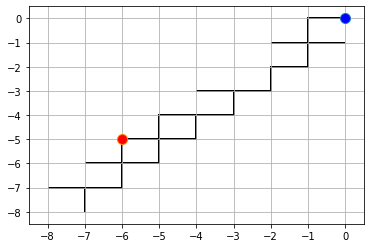

bounce count:63


In [36]:
#5
#see #1 for explanation on most functions in this code.
import random;
import numpy as np;
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

def rand_dir():
  d = random.randrange(4);
  if d == 0:
    return np.array([1, 0])
  if d == 1:
    return np.array([-1, 0])
  if d == 2:
    return np.array([0, 1])
  return np.array([0, -1])

def distance(x):
  return ((x[0])**2 + (x[1])**2)**(1/2);

#checks if pos of random walk 1 is equal to the pos of random walk 2, if so they will bounce
def checkAvailable(x,y):
  if x == y:
    return True
  return False

def walk(N):
  max_distance = 0.0;
  min_x = 0.0;
  max_x = 0.0;
  min_y = 0.0;
  max_y = 0.0;
  bounceCount = 0

  p = np.zeros((N, 2));
  for i in range(N):
    dir = rand_dir();
    if i == 0:
      p[i] = [ 0, 0 ];
    else:
      while True:
        if (p[i][1] == 0 and dir[1] < 0): #or (p[i][0] == 0 and dir[0] < 0):
          dir = rand_dir();
        else:
          break
      p[i][0] = p[i - 1][0] + dir[0];
      p[i][1] = p[i - 1][1] + dir[1];
      if checkAvailable(p[i][0],p[i][1]) == False:
        #bounces if pos of both walks are the same
        p[i][0] = p[i - 1][0] - dir[0];
        p[i][1] = p[i - 1][1] - dir[1];
        bounceCount += 1
    dist = distance(p[i]);
    
    max_distance = max(max_distance, dist);
    min_x = min(p[i][0], min_x);
    max_x = max(p[i][0], max_x);
    min_y = min(p[i][1], min_y);
    max_y = max(p[i][1], max_y);
  return (p, max_distance, min_x, max_x, min_y, max_y,bounceCount);

N = 100
(positions, max_distance, min_x, max_x, min_y, max_y,bounceCount) = walk(N);

path = Path(positions);

edge_offset = 0.5;

fig, ax = plt.subplots()

patch = patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

ax.set_xlim(min_x - edge_offset, max_x + edge_offset)
ax.set_ylim(min_y - edge_offset, max_y + edge_offset)


plt.plot(positions[0][0], positions[0][1], marker="o", markersize=10, markerfacecolor="blue")
plt.plot(positions[-1][0], positions[-1][1], marker="o", markersize=10, markerfacecolor="red")

plt.grid();
plt.show()

print("bounce count:" + str(bounceCount))